# Part 3B: Statistical Testing

In [120]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import ranksums, wilcoxon, mannwhitneyu
from statistics import mean

In [3]:
# load data of model performance and parameters

model_perf = pd.read_csv('../data/Part_3_FINAL_BEST_performance_GridSearch.csv', index_col=0)

In [4]:
# view data

model_perf

,day_aggregation,time_shift,categorical_function,classifier_alg,params,train_index_size,X,y,train_acc,test_acc,AUC,threshold,threshold_test_F1,fatal_precision,fatal_recall,non_fatal_precision,non_fatal_recall
0,1,-1,<function to_categorial_binary_0 at 0x7f704d11...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...",381,[[-0.01996832 -0.03416379 -0.02493921 ... 0.0...,index\n2016-08-08 0.0\n2016-08-09 0.0\n2...,0.697548,0.708333,0.680060,0.865,0.454545,0.500000,0.416667,0.918605,0.940476
1,1,-1,<function to_categorial_binary_0 at 0x7f704d11...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...",381,[[-0.01996832 -0.03416379 -0.02493921 ... 0.0...,index\n2016-08-08 0.0\n2016-08-09 0.0\n2...,0.701635,0.822917,0.672619,0.860,0.416667,0.416667,0.416667,0.916667,0.916667
2,1,-1,<function to_categorial_binary_0 at 0x7f704d11...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...",381,[[-0.01996832 -0.03416379 -0.02493921 ... 0.0...,index\n2016-08-08 0.0\n2016-08-09 0.0\n2...,0.712534,0.364583,0.665675,0.525,0.500000,0.500000,0.500000,0.928571,0.928571
3,1,-1,<function to_categorial_binary_0 at 0x7f704d11...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...",381,[[-0.01996832 -0.03416379 -0.02493921 ... 0.0...,index\n2016-08-08 0.0\n2016-08-09 0.0\n2...,0.688011,0.520833,0.334325,0.000,0.222222,0.125000,1.000000,0.000000,0.000000
4,1,-1,<function to_categorial_binary_0 at 0x7f704d11...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...",381,[[-0.01996832 -0.03416379 -0.02493921 ... 0.0...,index\n2016-08-08 0.0\n2016-08-09 0.0\n2...,0.698910,0.625000,0.348214,0.000,0.222222,0.125000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,6,-1,<function to_categorial_binary_6 at 0x7f70488a...,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': None, 'criterion': 'entropy',...",63,[[-0.00826849 -0.0440652 -0.02322548 ... 0.0...,index\n2016-08-08 0.0\n2016-08-14 0.0\...,1.000000,0.812500,0.564103,0.141,0.500000,0.400000,0.666667,0.909091,0.769231
10364,6,-1,<function to_categorial_binary_6 at 0x7f70488a...,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': None, 'criterion': 'entropy',...",63,[[-0.00826849 -0.0440652 -0.02322548 ... 0.0...,index\n2016-08-08 0.0\n2016-08-14 0.0\...,1.000000,0.812500,0.512821,0.140,0.444444,0.333333,0.666667,0.900000,0.692308
10365,6,-1,<function to_categorial_binary_6 at 0x7f70488a...,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': None, 'criterion': 'entropy',...",63,[[-0.00826849 -0.0440652 -0.02322548 ... 0.0...,index\n2016-08-08 0.0\n2016-08-14 0.0\...,1.000000,0.812500,0.564103,0.121,0.444444,0.333333,0.666667,0.900000,0.692308
10366,6,-1,<function to_categorial_binary_6 at 0x7f70488a...,<class 'sklearn.ensemble._forest.RandomForestC...,"{'class_weight': None, 'criterion': 'entropy',...",63,[[-0.00826849 -0.0440652 -0.02322548 ... 0.0...,index\n2016-08-08 0.0\n2016-08-14 0.0\...,1.000000,0.812500,0.564103,0.141,0.500000,0.400000,0.666667,0.909091,0.769231


# 1. Statistical Analysis of Model Performance

In [164]:
# define evaluation metrics

optimizing_metric = 'AUC'
satisfying_metric = 'fatal_precision'
satisfying_threshold = 0.6

#
samples = []
sample_means = []
aggregations = model_perf.day_aggregation.unique()
for agg in aggregations:
    # get models for given unit of aggregation
    agg_model_perf = model_perf.loc[model_perf.day_aggregation == agg].copy()
    # get models by satisfying metric - positive class precision
    agg_model_perf = agg_model_perf.loc[agg_model_perf[satisfying_metric] >= satisfying_threshold].copy()
    # get models sorted by optimizing metric - AUC
    sample = list(agg_model_perf.AUC.sort_values(ascending=False)[:100])
    sample_mean = mean(sample)
    samples.append(sample)
    sample_means.append(sample_mean)

# Conduct pairwise Mann-Whitney U non-parametric statistical test of AUC values 
stat_results = pd.DataFrame(columns=['sample1', 'sample2', 'p_val', 'significance'])
for agg1, sample1 in enumerate(samples):
    for agg2, sample2 in enumerate(samples):
        if agg1 == agg2:
            continue
        p_val = mannwhitneyu(sample1,sample2)[1]
        if p_val <= 0.05:
            sig = 1
        else:
            sig = 0
        stat_results = stat_results.append({'sample1':aggregations[agg1],
                             'sample2':aggregations[agg2],
                             'p_val':p_val,
                             'significance':sig}, ignore_index=True)



In [167]:
# view results

stat_results

,sample1,sample2,p_val,significance
0,1.0,2.0,2.721244e-02,1.0
1,1.0,3.0,2.726656e-09,1.0
2,1.0,4.0,5.657514e-09,1.0
3,1.0,5.0,1.450396e-11,1.0
4,1.0,6.0,7.251946e-12,1.0
5,2.0,1.0,2.721244e-02,1.0
6,2.0,3.0,2.917883e-02,1.0
7,2.0,4.0,1.397619e-01,0.0
8,2.0,5.0,7.101849e-04,1.0
9,2.0,6.0,3.647338e-01,0.0


In [187]:
# locate non-significant comparisons

stat_results.loc[stat_results.significance == 0]

,sample1,sample2,p_val,significance
7,2.0,4.0,0.139762,0.0
9,2.0,6.0,0.364734,0.0
16,4.0,2.0,0.139762,0.0
26,6.0,2.0,0.364734,0.0


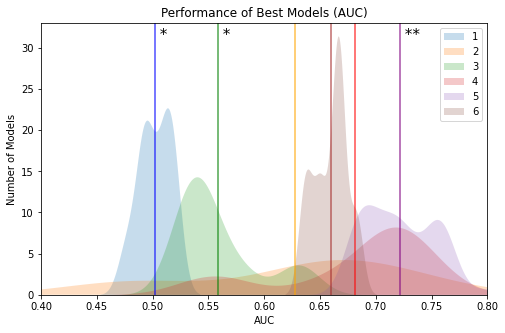

In [383]:
# visualize distribution of model performances and statistical difference

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)

w = sns.kdeplot(samples[0], ax=ax, fill=True, linewidth=0)
sns.kdeplot(samples[1], ax=ax, fill=True, linewidth=0)
sns.kdeplot(samples[2], ax=ax, fill=True, linewidth=0)
sns.kdeplot(samples[3], ax=ax, fill=True, linewidth=0)
sns.kdeplot(samples[4], ax=ax, fill=True, linewidth=0)
sns.kdeplot(samples[5], ax=ax, fill=True, linewidth=0)

plt.axvline([sample_means[0]], color='blue', alpha=0.7)
plt.axvline([sample_means[1]], color='orange', alpha=0.7)
plt.axvline([sample_means[2]], color='green', alpha=0.7)
plt.axvline([sample_means[3]], color='red', alpha=0.7)
plt.axvline([sample_means[4]], color='purple', alpha=0.7)
plt.axvline([sample_means[5]], color='brown', alpha=0.7)

plt.text(sample_means[0],31, ' *', fontsize=15)
plt.text(sample_means[2],31, ' *', fontsize=15)
plt.text(sample_means[4],31, ' **', fontsize=15)

plt.xlim(0.4, 0.8)
plt.legend(aggregations)
plt.title('Performance of Best Models (AUC)')
plt.ylabel('Number of Models')
plt.xlabel('AUC')
plt.show()

In [354]:
# transform statistical results to visualize in a heatmap

pval_matrix = pd.DataFrame(columns=range(1,7))
pval_matrix.reindex(range(1,7))
for col in pval_matrix.columns:
    pval_dict = {1:'',2:'',3:'',4:'',5:'',6:''}
    for row in range(1,7):
        pval_df = stat_results.loc[stat_results.sample1==col].loc[stat_results.sample2==row]
        if len(pval_df) == 0:
            pval = 1
        else:
            pval = pval_df.p_val.item()
        pval_dict[row] = pval
        
    pval_matrix = pval_matrix.append(pval_dict, ignore_index=True)  

In [358]:
# adjust index

pval_matrix.index +=1

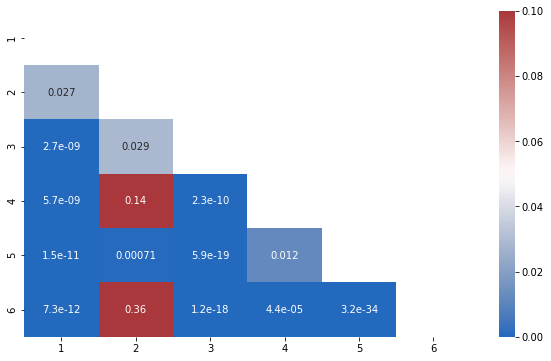

In [374]:
# visualize heatmap of p-values

plt.figure(figsize=(10,6))
matrix = np.triu(pval_matrix)
sns.heatmap(pval_matrix, annot=True, center=0.05, cmap='vlag', vmax=0.1, mask=matrix)
plt.show()

# 2. Select Best Model 

In [399]:
# get best models meething the following criteria 

model_perf.loc[(model_perf.fatal_recall>=.75) & 
               (model_perf.fatal_precision>=0.75) & 
               (model_perf.train_acc - model_perf.test_acc < 0.2) &
               (model_perf.train_acc >= model_perf.test_acc) & 
               (model_perf.AUC > 0.75)]


,day_aggregation,time_shift,categorical_function,classifier_alg,params,train_index_size,X,y,train_acc,test_acc,AUC,threshold,threshold_test_F1,fatal_precision,fatal_recall,non_fatal_precision,non_fatal_recall
7885,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.8, 'class_weight': 'balanced', 'gamma'...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.868056,0.842105,0.750000,0.560,0.75,0.75,0.75,0.933333,0.933333
7903,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.8, 'class_weight': None, 'gamma': 'sca...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.868056,0.842105,0.750000,0.560,0.75,0.75,0.75,0.933333,0.933333
7921,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.9, 'class_weight': 'balanced', 'gamma'...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.861111,0.842105,0.766667,0.501,0.75,0.75,0.75,0.933333,0.933333
7939,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 0.9, 'class_weight': None, 'gamma': 'sca...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.861111,0.842105,0.766667,0.501,0.75,0.75,0.75,0.933333,0.933333
7957,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 1.0, 'class_weight': 'balanced', 'gamma'...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.861111,0.842105,0.766667,0.426,0.75,0.75,0.75,0.933333,0.933333
7975,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 1.0, 'class_weight': None, 'gamma': 'sca...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.861111,0.842105,0.766667,0.426,0.75,0.75,0.75,0.933333,0.933333
7993,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 1.3, 'class_weight': 'balanced', 'gamma'...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.861111,0.842105,0.800000,0.285,0.75,0.75,0.75,0.933333,0.933333
8011,5,-1,<function to_categorial_binary_3 at 0x7f704d35...,<class 'sklearn.svm._classes.SVC'>,"{'C': 1.3, 'class_weight': None, 'gamma': 'sca...",76,[[-0.00787217 -0.04352264 -0.0232298 ... 0.0...,index\n2016-08-08 0.0\n2016-08-13 0.0\...,0.861111,0.842105,0.800000,0.285,0.75,0.75,0.75,0.933333,0.933333


In [400]:
# view parameters of best model

model_perf.params[7921]

"{'C': 0.9, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly'}"

In [325]:
dic[1] 4

In [326]:
dic

{1: 8, 2: ''}

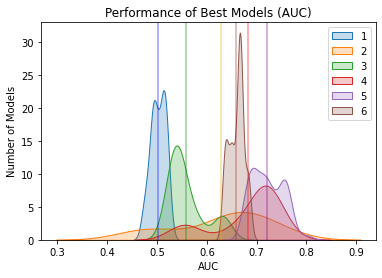

In [235]:
fig, ax = plt.subplots()

w = sns.kdeplot(samples[0], ax=ax, fill=True, linewidth=1)
sns.kdeplot(samples[1], ax=ax, fill=True, linewidth=1)
sns.kdeplot(samples[2], ax=ax, fill=True, linewidth=1)
sns.kdeplot(samples[3], ax=ax, fill=True, linewidth=1)
sns.kdeplot(samples[4], ax=ax, fill=True, linewidth=1)
sns.kdeplot(samples[5], ax=ax, fill=True, linewidth=1)

plt.axvline([sample_means[0]], color='blue', alpha=0.4)
plt.axvline([sample_means[1]], color='orange', alpha=0.4)
plt.axvline([sample_means[2]], color='green', alpha=0.4)
plt.axvline([sample_means[3]], color='red', alpha=0.4)
plt.axvline([sample_means[4]], color='purple', alpha=0.4)
plt.axvline([sample_means[5]], color='brown', alpha=0.4)


plt.legend(aggregations)
plt.title('Performance of Best Models (AUC)')
plt.ylabel('Number of Models')
plt.xlabel('AUC')
plt.show()

# Is there an impact of different aggregations of days?

In [139]:
samples = []
sample_means = []
aggregations = model_perf.day_aggregation.unique()
for agg in aggregations:
    agg_model_perf = model_perf.loc[model_perf.day_aggregation == agg].copy()
    sample = list(agg_model_perf.AUC.sort_values(ascending=False)[:100])
    sample_mean = mean(sample)
#     sample = list(agg_model_perf.AUC)
    samples.append(sample)
    sample_means.append(sample_mean)

stat_results = pd.DataFrame(columns=['sample1', 'sample2', 'p_val', 'significance'])
for agg1, sample1 in enumerate(samples):
    for agg2, sample2 in enumerate(samples):
        if agg1 == agg2:
            continue
        p_val = mannwhitneyu(sample1,sample2)[1]
        if p_val <= 0.05:
            sig = 1
        else:
            sig = 0
        stat_results = stat_results.append({'sample1':aggregations[agg1],
                             'sample2':aggregations[agg2],
                             'p_val':p_val,
                             'significance':sig}, ignore_index=True)

In [140]:
sample_means

[0.7785106382978724,
 0.6597059023527811,
 0.6495877742946708,
 0.6501992481203007,
 0.7315833333333334,
 0.671070707070707]

In [141]:
stat_results

,sample1,sample2,p_val,significance
0,1.0,2.0,2.990312e-35,1.0
1,1.0,3.0,2.193977e-35,1.0
2,1.0,4.0,1.670744e-35,1.0
3,1.0,5.0,2.957172e-28,1.0
4,1.0,6.0,4.451947e-37,1.0
5,2.0,1.0,2.990312e-35,1.0
6,2.0,3.0,1.404044e-03,1.0
7,2.0,4.0,1.852305e-02,1.0
8,2.0,5.0,6.139876e-33,1.0
9,2.0,6.0,7.364731e-11,1.0


In [26]:
stat_results.loc[stat_results.significance == 0]

,sample1,sample2,p_val,significance
12,3.0,4.0,0.1252,0.0
17,4.0,3.0,0.1252,0.0


In [10]:
stat_results.groupby('sample1').sum()['significance']

sample1
1.0    5.0
2.0    5.0
3.0    4.0
4.0    4.0
5.0    5.0
6.0    5.0
Name: significance, dtype: float64

# ==> No difference between aggregations of 3 and 4 days -- model performance is not statistically different when days aggregated =3 or 4

In [43]:
samples = []
models = model_perf.classifier_alg.unique()
for model in models:
    print(model)
    model_model_perf = model_perf.loc[model_perf.classifier_alg == model].copy()
    sample = list(model_model_perf.AUC.sort_values(ascending=False)[:100])
    mean_auc = sum(sample)/len(sample)
    print(mean_auc)
    samples.append(sample)

stat_results = pd.DataFrame(columns=['sample1', 'sample2', 'p_val', 'significance'])
for agg1, sample1 in enumerate(samples):
    for agg2, sample2 in enumerate(samples):
        p_val = mannwhitneyu(sample1,sample2,method='exact')[1]
        if p_val <= 0.05:
            sig = 1
        else:
            sig = 0
        stat_results = stat_results.append({'sample1':models[agg1],
                             'sample2':models[agg2],
                             'p_val':p_val,
                             'significance':sig}, ignore_index=True)

<class 'sklearn.svm._classes.SVC'>
0.7801134751773059
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7176973684210536


# ==> Sig diff in the accuracy of svc and RF

In [40]:
stat_results

,sample1,sample2,p_val,significance
0,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.svm._classes.SVC'>,1.000000e+00,0
1,<class 'sklearn.svm._classes.SVC'>,<class 'sklearn.ensemble._forest.RandomForestC...,2.208761e-59,1
2,<class 'sklearn.ensemble._forest.RandomForestC...,<class 'sklearn.svm._classes.SVC'>,2.208761e-59,1
3,<class 'sklearn.ensemble._forest.RandomForestC...,<class 'sklearn.ensemble._forest.RandomForestC...,1.000000e+00,0


In [21]:
samples = []
models = model_perf.categorical_function.unique()
for model in models:
    model_model_perf = model_perf.loc[model_perf.categorical_function == model].copy()
    sample = list(model_model_perf.AUC.sort_values(ascending=False)[:100])
    samples.append(sample)

stat_results = pd.DataFrame(columns=['sample1', 'sample2', 'p_val', 'significance'])
for agg1, sample1 in enumerate(samples):
    for agg2, sample2 in enumerate(samples):
        if agg1 == agg2:
            continue
        p_val = mannwhitneyu(sample1,sample2)[1]
        if p_val <= 0.05:
            sig = 1
        else:
            sig = 0
        stat_results = stat_results.append({'sample1':models[agg1],
                             'sample2':models[agg2],
                             'p_val':p_val,
                             'significance':sig}, ignore_index=True)

In [22]:
stat_results

,sample1,sample2,p_val,significance
0,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_1 at 0x7f704d11...,5.958266e-21,1
1,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_2 at 0x7f704d35...,1.355873e-29,1
2,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_3 at 0x7f704d35...,1.132013e-05,1
3,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_4 at 0x7f704d35...,6.695885e-16,1
4,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_6 at 0x7f70488a...,3.143697e-35,1
5,<function to_categorial_binary_1 at 0x7f704d11...,<function to_categorial_binary_0 at 0x7f704d11...,5.958266e-21,1
6,<function to_categorial_binary_1 at 0x7f704d11...,<function to_categorial_binary_2 at 0x7f704d35...,3.958396e-03,1
7,<function to_categorial_binary_1 at 0x7f704d11...,<function to_categorial_binary_3 at 0x7f704d35...,3.954710e-25,1
8,<function to_categorial_binary_1 at 0x7f704d11...,<function to_categorial_binary_4 at 0x7f704d35...,1.173378e-08,1
9,<function to_categorial_binary_1 at 0x7f704d11...,<function to_categorial_binary_6 at 0x7f70488a...,2.770505e-35,1


In [33]:
samples = []
combos = []
aggregations = model_perf.day_aggregation.unique()
categories = model_perf.categorical_function.unique()
for agg in aggregations:
    for cat_f in categories:
        combo = [agg, cat_f]
        combos.append(combo)
        agg_model_perf = model_perf.loc[(model_perf.day_aggregation == agg) &
                                        (model_perf.categorical_function == cat_f)].copy()
        sample = list(agg_model_perf.AUC.sort_values(ascending=False)[:100])
        samples.append(sample)

stat_results = pd.DataFrame(columns=['sample1', 'sample2', 'p_val', 'significance'])
for agg1, sample1 in enumerate(samples):
    for agg2, sample2 in enumerate(samples):
        if agg1 == agg2:
            continue
        p_val = mannwhitneyu(sample1,sample2)[1]
        if p_val <= 0.05:
            sig = 1
        else:
            sig = 0
        stat_results = stat_results.append({'sample1':combos[agg1],
                             'sample2':combos[agg2],
                             'p_val':p_val,
                             'significance':sig}, ignore_index=True)

In [34]:
stat_results

,sample1,sample2,p_val,significance
0,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_1 at 0x7f70...",2.344773e-34,1
1,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_2 at 0x7f70...",2.449732e-34,1
2,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_3 at 0x7f70...",2.424438e-34,1
3,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_4 at 0x7f70...",2.424438e-34,1
4,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_6 at 0x7f70...",3.125787e-35,1
...,...,...,...,...
1255,"[6, <function to_categorial_binary_6 at 0x7f70...","[6, <function to_categorial_binary_0 at 0x7f70...",4.617752e-39,1
1256,"[6, <function to_categorial_binary_6 at 0x7f70...","[6, <function to_categorial_binary_1 at 0x7f70...",1.063929e-21,1
1257,"[6, <function to_categorial_binary_6 at 0x7f70...","[6, <function to_categorial_binary_2 at 0x7f70...",1.137338e-07,1
1258,"[6, <function to_categorial_binary_6 at 0x7f70...","[6, <function to_categorial_binary_3 at 0x7f70...",1.000000e+00,0


In [38]:
stat_results.loc[stat_results.significance==0][:50]

,sample1,sample2,p_val,significance
42,"[1, <function to_categorial_binary_1 at 0x7f70...","[2, <function to_categorial_binary_2 at 0x7f70...",0.055387,0
46,"[1, <function to_categorial_binary_1 at 0x7f70...","[3, <function to_categorial_binary_0 at 0x7f70...",0.319053,0
87,"[1, <function to_categorial_binary_2 at 0x7f70...","[4, <function to_categorial_binary_0 at 0x7f70...",0.558317,0
94,"[1, <function to_categorial_binary_2 at 0x7f70...","[5, <function to_categorial_binary_1 at 0x7f70...",0.384809,0
108,"[1, <function to_categorial_binary_3 at 0x7f70...","[1, <function to_categorial_binary_4 at 0x7f70...",1.000000,0
122,"[1, <function to_categorial_binary_3 at 0x7f70...","[4, <function to_categorial_binary_0 at 0x7f70...",0.069928,0
132,"[1, <function to_categorial_binary_3 at 0x7f70...","[5, <function to_categorial_binary_4 at 0x7f70...",0.122164,0
133,"[1, <function to_categorial_binary_3 at 0x7f70...","[5, <function to_categorial_binary_6 at 0x7f70...",0.122164,0
137,"[1, <function to_categorial_binary_3 at 0x7f70...","[6, <function to_categorial_binary_3 at 0x7f70...",0.053399,0
138,"[1, <function to_categorial_binary_3 at 0x7f70...","[6, <function to_categorial_binary_4 at 0x7f70...",0.053399,0


In [45]:
stat_results.sample1 = stat_results.sample1.astype('str')
stat_results[['sample1', 'significance']].groupby('sample1').sum()

,significance
sample1,
"[1, '<function to_categorial_binary_0 at 0x7f704d111dd0>']",31
"[1, '<function to_categorial_binary_1 at 0x7f704d111cb0>']",30
"[1, '<function to_categorial_binary_2 at 0x7f704d356440>']",35
"[1, '<function to_categorial_binary_3 at 0x7f704d356680>']",28
"[1, '<function to_categorial_binary_4 at 0x7f704d3568c0>']",28
"[1, '<function to_categorial_binary_6 at 0x7f70488afa70>']",34
"[2, '<function to_categorial_binary_0 at 0x7f704d111dd0>']",18
"[2, '<function to_categorial_binary_1 at 0x7f704d111cb0>']",30
"[2, '<function to_categorial_binary_2 at 0x7f704d356440>']",35


In [44]:
samples = []
combos = []
aggregations = model_perf.day_aggregation.unique()
categories = model_perf.categorical_function.unique()
for agg in aggregations:
    for cat_f in categories:
        combo = [agg, cat_f]
        combos.append(combo)
        agg_model_perf = model_perf.loc[(model_perf.day_aggregation == agg) &
                                        (model_perf.categorical_function == cat_f)].copy()
        sample = list(agg_model_perf.AUC.sort_values(ascending=False)[:100])
        samples.append(sample)

stat_results = pd.DataFrame(columns=['sample1', 'sample2', 'p_val', 'significance'])
for agg1, sample1 in enumerate(samples):
    for agg2, sample2 in enumerate(samples):
        if agg1 == agg2:
            continue
        p_val = mannwhitneyu(sample1,sample2)[1]
        if p_val <= 0.05:
            sig = 1
        else:
            sig = 0
        stat_results = stat_results.append({'sample1':combos[agg1],
                             'sample2':combos[agg2],
                             'p_val':p_val,
                             'significance':sig}, ignore_index=True)

In [52]:
stat_results['agg1'] = [stat_results.sample1[i][0] for i in range(len(stat_results))]
stat_results['cat1'] = [stat_results.sample1[i][1] for i in range(len(stat_results))]

stat_results['agg2'] = [stat_results.sample2[i][0] for i in range(len(stat_results))]
stat_results['cat2'] = [stat_results.sample2[i][1] for i in range(len(stat_results))]

In [62]:
stat_results[:50]

,sample1,sample2,p_val,significance,agg1,cat1,agg2,cat2
0,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_1 at 0x7f70...",2.344773e-34,1,1,<function to_categorial_binary_0 at 0x7f704d11...,1,<function to_categorial_binary_1 at 0x7f704d11...
1,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_2 at 0x7f70...",2.449732e-34,1,1,<function to_categorial_binary_0 at 0x7f704d11...,1,<function to_categorial_binary_2 at 0x7f704d35...
2,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_3 at 0x7f70...",2.424438e-34,1,1,<function to_categorial_binary_0 at 0x7f704d11...,1,<function to_categorial_binary_3 at 0x7f704d35...
3,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_4 at 0x7f70...",2.424438e-34,1,1,<function to_categorial_binary_0 at 0x7f704d11...,1,<function to_categorial_binary_4 at 0x7f704d35...
4,"[1, <function to_categorial_binary_0 at 0x7f70...","[1, <function to_categorial_binary_6 at 0x7f70...",3.125787e-35,1,1,<function to_categorial_binary_0 at 0x7f704d11...,1,<function to_categorial_binary_6 at 0x7f70488a...
5,"[1, <function to_categorial_binary_0 at 0x7f70...","[2, <function to_categorial_binary_0 at 0x7f70...",2.753305e-31,1,1,<function to_categorial_binary_0 at 0x7f704d11...,2,<function to_categorial_binary_0 at 0x7f704d11...
6,"[1, <function to_categorial_binary_0 at 0x7f70...","[2, <function to_categorial_binary_1 at 0x7f70...",2.088351e-34,1,1,<function to_categorial_binary_0 at 0x7f704d11...,2,<function to_categorial_binary_1 at 0x7f704d11...
7,"[1, <function to_categorial_binary_0 at 0x7f70...","[2, <function to_categorial_binary_2 at 0x7f70...",2.401567e-34,1,1,<function to_categorial_binary_0 at 0x7f704d11...,2,<function to_categorial_binary_2 at 0x7f704d35...
8,"[1, <function to_categorial_binary_0 at 0x7f70...","[2, <function to_categorial_binary_3 at 0x7f70...",1.563689e-29,1,1,<function to_categorial_binary_0 at 0x7f704d11...,2,<function to_categorial_binary_3 at 0x7f704d35...
9,"[1, <function to_categorial_binary_0 at 0x7f70...","[2, <function to_categorial_binary_4 at 0x7f70...",1.563689e-29,1,1,<function to_categorial_binary_0 at 0x7f704d11...,2,<function to_categorial_binary_4 at 0x7f704d35...


In [104]:
aggs = []

aggregations = model_perf.day_aggregation.unique()
categories = model_perf.categorical_function.unique()

for agg in aggregations:
    agg_model_perf = model_perf.loc[model_perf.day_aggregation == agg]
    samples= []
    for cat in categories:
        cat_model_perf = agg_model_perf.loc[agg_model_perf.categorical_function == cat]    
        sample = list(cat_model_perf.AUC.sort_values(ascending=False)[:100])
        samples.append(sample)
    aggs.append(samples)
    
stat_results = pd.DataFrame(columns=['agg', 'sample1', 'sample2', 'p_val', 'significance'])
for idx_agg, agg in enumerate(aggs):
    for cat1, sample1 in enumerate(agg):
        for cat2, sample2 in enumerate(agg):
            if cat1 == cat2:
                continue
            p_val = mannwhitneyu(sample1,sample2)[1]
            if p_val <= 0.05:
                sig = 1
            else:
                sig = 0
            stat_results = stat_results.append({'agg':aggregations[idx_agg],
                                                'sample1':categories[cat1],
                                                'sample2':categories[cat2],
                                                'p_val':p_val,
                                                'significance':sig}, ignore_index=True)

In [107]:
stat_results

,agg,sample1,sample2,p_val,significance
0,1,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_1 at 0x7f704d11...,2.344773e-34,1
1,1,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_2 at 0x7f704d35...,2.449732e-34,1
2,1,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_3 at 0x7f704d35...,2.424438e-34,1
3,1,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_4 at 0x7f704d35...,2.424438e-34,1
4,1,<function to_categorial_binary_0 at 0x7f704d11...,<function to_categorial_binary_6 at 0x7f70488a...,3.125787e-35,1
...,...,...,...,...,...
175,6,<function to_categorial_binary_6 at 0x7f70488a...,<function to_categorial_binary_0 at 0x7f704d11...,4.617752e-39,1
176,6,<function to_categorial_binary_6 at 0x7f70488a...,<function to_categorial_binary_1 at 0x7f704d11...,1.063929e-21,1
177,6,<function to_categorial_binary_6 at 0x7f70488a...,<function to_categorial_binary_2 at 0x7f704d35...,1.137338e-07,1
178,6,<function to_categorial_binary_6 at 0x7f70488a...,<function to_categorial_binary_3 at 0x7f704d35...,1.000000e+00,0


In [117]:
for agg_ in stat_results['agg'].unique():
    print(agg_)
    agg_results = stat_results.loc[stat_results['agg'] == agg_].copy()
    agg_results = agg_results[['sample1','significance']].groupby('sample1').sum()
#     display(agg_results.loc[agg_results.significance == 0])
    display(agg_results)

1


,significance
sample1,
<function to_categorial_binary_0 at 0x7f704d111dd0>,5
<function to_categorial_binary_1 at 0x7f704d111cb0>,5
<function to_categorial_binary_2 at 0x7f704d356440>,5
<function to_categorial_binary_3 at 0x7f704d356680>,4
<function to_categorial_binary_4 at 0x7f704d3568c0>,4
<function to_categorial_binary_6 at 0x7f70488afa70>,5


2


,significance
sample1,
<function to_categorial_binary_0 at 0x7f704d111dd0>,5
<function to_categorial_binary_1 at 0x7f704d111cb0>,5
<function to_categorial_binary_2 at 0x7f704d356440>,5
<function to_categorial_binary_3 at 0x7f704d356680>,3
<function to_categorial_binary_4 at 0x7f704d3568c0>,3
<function to_categorial_binary_6 at 0x7f70488afa70>,3


3


,significance
sample1,
<function to_categorial_binary_0 at 0x7f704d111dd0>,5
<function to_categorial_binary_1 at 0x7f704d111cb0>,5
<function to_categorial_binary_2 at 0x7f704d356440>,5
<function to_categorial_binary_3 at 0x7f704d356680>,3
<function to_categorial_binary_4 at 0x7f704d3568c0>,3
<function to_categorial_binary_6 at 0x7f70488afa70>,3


4


,significance
sample1,
<function to_categorial_binary_0 at 0x7f704d111dd0>,4
<function to_categorial_binary_1 at 0x7f704d111cb0>,4
<function to_categorial_binary_2 at 0x7f704d356440>,5
<function to_categorial_binary_3 at 0x7f704d356680>,3
<function to_categorial_binary_4 at 0x7f704d3568c0>,3
<function to_categorial_binary_6 at 0x7f70488afa70>,3


5


,significance
sample1,
<function to_categorial_binary_0 at 0x7f704d111dd0>,3
<function to_categorial_binary_1 at 0x7f704d111cb0>,5
<function to_categorial_binary_2 at 0x7f704d356440>,5
<function to_categorial_binary_3 at 0x7f704d356680>,5
<function to_categorial_binary_4 at 0x7f704d3568c0>,3
<function to_categorial_binary_6 at 0x7f70488afa70>,3


6


,significance
sample1,
<function to_categorial_binary_0 at 0x7f704d111dd0>,5
<function to_categorial_binary_1 at 0x7f704d111cb0>,5
<function to_categorial_binary_2 at 0x7f704d356440>,5
<function to_categorial_binary_3 at 0x7f704d356680>,3
<function to_categorial_binary_4 at 0x7f704d3568c0>,3
<function to_categorial_binary_6 at 0x7f70488afa70>,3
